In [94]:
# company_profile, salary_range, has_company_logo, has_questions
dados = pd.read_csv("data/fake_job_postings.csv")

# dados.count()
# dados[dados.fraudulent == 0].required_experience.isna().sum()
# dados[dados.fraudulent == 0].company_profile.value_counts()
# dados.iloc[98]
# scaler = StandardScaler()

# generos_escalados = scaler.fit_transform(dados[dados.fraudulent == 0].company_profile)
# dados.head()
# type(dados[dados.fraudulent == 0].company_profile.iloc[5])

# a = dados.groupby('has_company_logo').sum().fraudulent

dados.drop(dados[dados.fraudulent == 0][:16000].index, inplace=True)
dados.fraudulent.value_counts()

0    1014
1     866
Name: fraudulent, dtype: int64

Text(0.5, 1.0, 'Grafico de Barra')

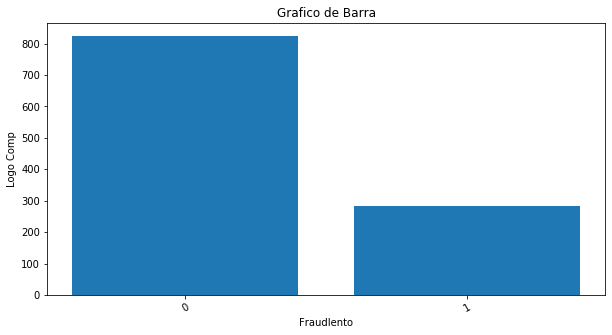

In [95]:
def toInt(y):
    try:
        return int(y)
    except ValueError as ve:
        return 0

def mean(x):
    if isinstance(x, list):
        return sum([toInt(y) for y in x])/2
    
def transf(x):
    if isinstance(x,float):
        return 0
    else:
        return 1
    
dados.salary_range = dados.salary_range.str.split(pat="-")

dados.salary_range = dados.salary_range.apply(mean)
dados.fillna({"salary_range":0}, inplace=True)

dados.company_profile = dados.company_profile.apply(transf)

# a = dados.groupby('fraudulent').sum().has_company_logo
# plt.figure(figsize=(10,5))
# plt.bar(a.index, a.tolist())
# plt.xlabel('Fraudlento', fontsize=10)
# plt.ylabel('Logo Comp', fontsize=10)
# plt.xticks(a.index, a.index, fontsize=10, rotation=30)
# plt.title('Grafico de Barra')


# scaler = StandardScaler()

# generos_escalados = scaler.fit_transform(generos)

# dados.has_company_logo

# trocar = {"Bachelor's Degree":0, "High School or equivalent":1, "Unspecified":2, "Master's Degree":3,
#          "Associate Degree":4, "Certification":5, "Some College Coursework Completed":6,"Professional":7,
#           "Vocational":8, "Some High School Coursework":9,"Doctorate":10, "Vocational - HS Diploma":11,
#          "Vocational - Degree ":12}

# dados.required_education = dados.required_education.map(trocar)
# dados.required_education.fillna(13, inplace=True)
# dados = pd.concat([dados, dados.employment_type.str.get_dummies()], axis=1)
# # dados = pd.concat([dados, dados.required_education.str.get_dummies()], axis=1)
# dados = pd.concat([dados, dados.industry.str.get_dummies()], axis=1)
# dados = pd.concat([dados, dados.required_experience.str.get_dummies()], axis=1)
# dados = pd.concat([dados, dados.function.str.get_dummies()], axis=1)


# dados.drop(['job_id'], axis=1, inplace=True)
# dados.drop(['employment_type'], axis=1, inplace=True)
# # dados.drop(['required_education'], axis=1, inplace=True)
# dados.drop(['industry'], axis=1, inplace=True)
# dados.drop(['required_experience'], axis=1, inplace=True)
# dados.drop(['function', 'title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits'], axis=1, inplace=True)

In [57]:
#     print(i)
y = dados["fraudulent"]
# dados.drop(['fraudulent'], axis=1, inplace=True)
    
x = dados[['company_profile','has_company_logo', 'has_questions']]



np.random.seed(8)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos " % (len(treino_x), len(teste_x)))

Treinaremos com 1410 elementos e testaremos com 470 elementos 


In [75]:
modelo1 = SVC()
modelo1.fit(treino_x, treino_y)


previsoes = modelo1.predict(teste_x)


acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi de : %.2f%% " % acuracia)

# dados.head()

A acurácia foi de : 75.96% 


In [67]:
# teste_x["fraudulento"] = previsoes
# teste_x.head()

# for i in previsoes:
#     if i == 0:
#         print("UM")

In [60]:
dump(modelo1, 'modelo1.joblib') 

['modelo1.joblib']

In [61]:
modelo = load('modelo1.joblib')

In [81]:
# previsoes[:]
dados[dados.fraudulent == 0]

# teste_y[teste_y.iloc[] == 1].values[:-1]
# modelo.predict([dados.iloc[2][['company_profile','has_company_logo', 'has_questions']].values])
modelo.predict([[1,1,1]])
# for i in range(100,200):
#     print()
#     
#     if a == 0:
#         print("Aqui")


array([0])